In [21]:
from sklearn.model_selection import train_test_split # Library for separating samples for training and testing, training learning curve and to process cross-validation
from sklearn.neural_network import MLPRegressor # Regressor MLP
from sklearn.preprocessing import StandardScaler, MinMaxScaler # Data normalization
from sklearn import metrics # Metrics evaluation
import matplotlib.pyplot as plt # Graph visualization
import warnings
import numpy as np
import seaborn as sns
import pandas as pd
from google.colab import drive
drive.mount('/content/drive') # Creating the drive folder

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [22]:
warnings.filterwarnings('ignore')  # Ignore all the warnings

In [23]:
# Creating and reading a database with Pandas
df = pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/atividade05_temperaturas/variacaoValores.csv")

# Separation of training and testing data
dadosTreino = df[:100]
dadosTeste = df[100:120]

dadosTreino = dadosTreino.iloc[:, 1].values
dadosTeste = dadosTeste.iloc[:, 1].values

**DATA SEPARATION WITH 5 SAMPLES - NETWORK 1**

In [24]:
# Creating a new dataframe with 5 data points to retrieve previous data samples and compare with the forecast
df_treino_5 = pd.DataFrame(columns = ['x-5', 'x-4', 'x-3', 'x-2', 'x-1', 'x'])
df_teste_5 = pd.DataFrame(columns = ['x-5', 'x-4', 'x-3', 'x-2', 'x-1', 'x'])

# The subtraction must be changed with each dataframe change - Populating TRAINING
for i in range(len(dadosTreino)-5):
  # A new dataframe is created that will receive the delayed data and the target in x for building the samples that will be presented in training
  df_new_row = pd.DataFrame({'x-5': [dadosTreino[i]], 'x-4': [dadosTreino[i+1]], 'x-3': [dadosTreino[i+2]],
                             'x-2': [dadosTreino[i+3]], 'x-1': [dadosTreino[i+4]],'x': [dadosTreino[i+5]]})
  # The new sample is inserted into the dataframe relative to the current training and the NA data is deleted
  if not df_new_row.empty and not df_new_row.isna().all().all():
    df_treino_5 = pd.concat([df_treino_5, df_new_row], ignore_index = True)

# The subtraction must be changed with each dataframe change - Populating TEST
for i in range(len(dadosTeste)-5):
  # A new dataframe is created that will receive the delayed data and the target in x for building the samples that will be presented in testing
  df_new_row = pd.DataFrame({'x-5': [dadosTeste[i]], 'x-4': [dadosTeste[i+1]], 'x-3': [dadosTeste[i+2]],
                             'x-2': [dadosTeste[i+3]], 'x-1': [dadosTeste[i+4]],'x': [dadosTeste[i+5]]})
  # The new sample is inserted into the dataframe relative to the current training and the NA data is deleted
  if not df_new_row.empty and not df_new_row.isna().all().all():
    df_teste_5 = pd.concat([df_teste_5, df_new_row], ignore_index = True)

y_treino_5 = df_treino_5[['x']] # Creating the desired outputs
x_treino_5 = df_treino_5.drop('x', axis = 1) # Deleting variable x from inputs

y_teste_5 = df_teste_5[['x']] # Creating the desired outputs with y
x_teste_5 = df_teste_5.drop('x', axis = 1) # Deleting variable x from inputs

**DATA SEPARATION WITH 10 SAMPLES - NETWORK 2**

In [25]:
# Creating a new dataframe with 10 data points to retrieve previous data samples and compare with the forecast
df_treino_10 = pd.DataFrame(columns = ['x-10', 'x-9', 'x-8', 'x-7', 'x-6', 'x-5', 'x-4', 'x-3', 'x-2', 'x-1', 'x'])
df_teste_10 = pd.DataFrame(columns = ['x-10', 'x-9', 'x-8', 'x-7', 'x-6', 'x-5', 'x-4', 'x-3', 'x-2', 'x-1', 'x'])

# The subtraction must be changed with each dataframe change - TRAINING
for i in range(len(dadosTreino)-10):
  # A new dataframe is created that will receive the delayed data and the target in x for building the samples that will be presented in training
  df_new_row = pd.DataFrame({'x-10': [dadosTreino[i]], 'x-9': [dadosTreino[i+1]], 'x-8': [dadosTreino[i+2]], 'x-7': [dadosTreino[i+3]],
                             'x-6': [dadosTreino[i+4]], 'x-5': [dadosTreino[i+5]], 'x-4': [dadosTreino[i+6]], 'x-3': [dadosTreino[i+7]],
                             'x-2': [dadosTreino[i+8]], 'x-1': [dadosTreino[i+9]],'x': [dadosTreino[i+10]]})
  # The new sample is inserted into the dataframe relative to the current training and the NA data is deleted
  if not df_new_row.empty and not df_new_row.isna().all().all():
    df_treino_10 = pd.concat([df_treino_10, df_new_row], ignore_index = True)

# The subtraction must be changed with each dataframe change - TESTING
for i in range(len(dadosTeste)-10):
  # A new dataframe is created that will receive the delayed data and the target in x for building the samples that will be presented in testing
  df_new_row = pd.DataFrame({'x-10': [dadosTeste[i]], 'x-9': [dadosTeste[i+1]], 'x-8': [dadosTeste[i+2]], 'x-7': [dadosTeste[i+3]],
                             'x-6': [dadosTeste[i+4]], 'x-5': [dadosTeste[i+5]], 'x-4': [dadosTeste[i+6]], 'x-3': [dadosTeste[i+7]],
                             'x-2': [dadosTeste[i+8]], 'x-1': [dadosTeste[i+9]],'x': [dadosTeste[i+10]]})
  # The new sample is inserted into the dataframe relative to the current training and the NA data is deleted
  if not df_new_row.empty and not df_new_row.isna().all().all():
    df_teste_10 = pd.concat([df_teste_10, df_new_row], ignore_index = True)

y_treino_10 = df_treino_10[['x']] # Creating the desired outputs
x_treino_10 = df_treino_10.drop('x', axis = 1) # Deleting variable x from inputs

y_teste_10 = df_teste_10[['x']] # Creating the desired outputs with y
x_teste_10 = df_teste_10.drop('x', axis = 1) # Deleting variable x from inputs

**DATA SEPARATION WITH 15 SAMPLES - NETWORK 3**

In [26]:
# Creating a new dataframe with 15 data points to retrieve previous data samples and compare with the forecast
df_treino_15 = pd.DataFrame(columns = ['x-15', 'x-14', 'x-13', 'x-12', 'x-11', 'x-10', 'x-9', 'x-8', 'x-7', 'x-6', 'x-5', 'x-4', 'x-3', 'x-2', 'x-1', 'x'])
df_teste_15 = pd.DataFrame(columns = ['x-15', 'x-14', 'x-13', 'x-12', 'x-11', 'x-10', 'x-9', 'x-8', 'x-7', 'x-6', 'x-5', 'x-4', 'x-3', 'x-2', 'x-1', 'x'])

# The subtraction must be changed with each dataframe change - TRAINING
for i in range(len(dadosTreino)-15):
  # A new dataframe is created that will receive the delayed data and the target in x for building the samples that will be presented in training
  df_new_row = pd.DataFrame({'x-15': [dadosTreino[i]], 'x-14': [dadosTreino[i+1]], 'x-13': [dadosTreino[i+2]], 'x-12': [dadosTreino[i+3]], 'x-11': [dadosTreino[i+4]],
                             'x-10': [dadosTreino[i+5]], 'x-9': [dadosTreino[i+6]], 'x-8': [dadosTreino[i+7]], 'x-7': [dadosTreino[i+8]],
                             'x-6': [dadosTreino[i+9]], 'x-5': [dadosTreino[i+10]], 'x-4': [dadosTreino[i+11]], 'x-3': [dadosTreino[i+12]],
                             'x-2': [dadosTreino[i+13]], 'x-1': [dadosTreino[i+14]],'x': [dadosTreino[i+15]]})
  # The new sample is inserted into the dataframe relative to the current training and the NA data is deleted
  if not df_new_row.empty and not df_new_row.isna().all().all():
    df_treino_15 = pd.concat([df_treino_15, df_new_row], ignore_index = True)

# The subtraction must be changed with each dataframe change - TESTING
for i in range(len(dadosTeste)-15):
  # A new dataframe is created that will receive the delayed data and the target in x for building the samples that will be presented in testing
  df_new_row = pd.DataFrame({'x-15': [dadosTeste[i]], 'x-14': [dadosTeste[i+1]], 'x-13': [dadosTeste[i+2]], 'x-12': [dadosTeste[i+3]], 'x-11': [dadosTeste[i+4]],
                             'x-10': [dadosTeste[i+5]], 'x-9': [dadosTeste[i+6]], 'x-8': [dadosTeste[i+7]], 'x-7': [dadosTeste[i+8]],
                             'x-6': [dadosTeste[i+9]], 'x-5': [dadosTeste[i+10]], 'x-4': [dadosTeste[i+11]], 'x-3': [dadosTeste[i+12]],
                             'x-2': [dadosTeste[i+13]], 'x-1': [dadosTeste[i+14]],'x': [dadosTeste[i+15]]})
  # The new sample is inserted into the dataframe relative to the current training and the NA data is deleted
  if not df_new_row.empty and not df_new_row.isna().all().all():
    df_teste_15 = pd.concat([df_teste_15, df_new_row], ignore_index = True)

y_treino_15 = df_treino_15[['x']] # Creating the desired outputs
x_treino_15 = df_treino_15.drop('x', axis = 1) # Deleting variable x from inputs

y_teste_15 = df_teste_15[['x']] # Creating the desired outputs with y
x_teste_15 = df_teste_15.drop('x', axis = 1) # Deleting variable x from inputs

**SCALING OF ALL DATA FOR EACH SAMPLE**

In [27]:
scaler = MinMaxScaler()

# Data normalization with 5 samples
y_treino_5 = scaler.fit_transform(y_treino_5)
x_treino_5 = scaler.fit_transform(x_treino_5)
y_teste_5 = scaler.fit_transform(y_teste_5)
x_teste_5 = scaler.fit_transform(x_teste_5)

# Data normalization with 10 samples
y_treino_10 = scaler.fit_transform(y_treino_10)
x_treino_10 = scaler.fit_transform(x_treino_10)
y_teste_10 = scaler.fit_transform(y_teste_10)
x_teste_10 = scaler.fit_transform(x_teste_10)

# Data normalization with 15 samples
y_treino_15 = scaler.fit_transform(y_treino_15)
x_treino_15 = scaler.fit_transform(x_treino_15)
y_teste_15 = scaler.fit_transform(y_teste_15)
x_teste_15 = scaler.fit_transform(x_teste_15)

**TRAINING THE NETWORK**

In [28]:
# Training the network
mlp_reg = MLPRegressor(hidden_layer_sizes=(15), activation='relu', solver='adam', max_iter=5000,
                       tol=0.000001, #momentum=0.9,
                       early_stopping=True,
                       epsilon=1e-06, learning_rate_init = 0.001, #learning_rate = 'constant'
                       )

mlp_reg.fit(x_treino_5, y_treino_5)

MLPRegressor(early_stopping=True, epsilon=1e-06, hidden_layer_sizes=15,
             max_iter=5000, tol=1e-06)

**MODEL EVALUATION**

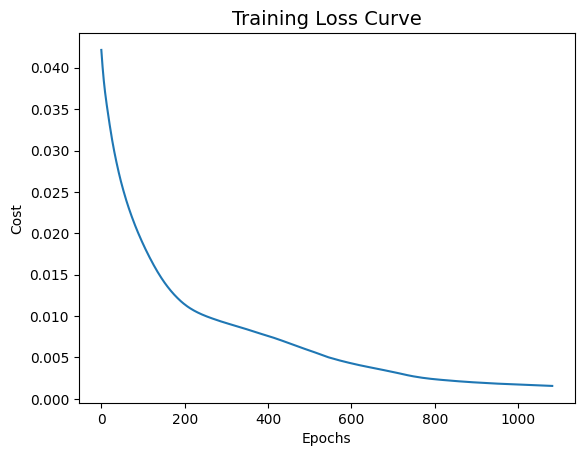

In [29]:
# Model evaluation
y_pred = mlp_reg.predict(x_teste_5)

# Plotting the error graph in the training process
plt.plot(mlp_reg.loss_curve_)
plt.title("Training Loss Curve", fontsize=14)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.show()

In [30]:
print('Epochs: ', mlp_reg.n_iter_)
print('Loss: ', mlp_reg.loss_)
print('Mean Absolute Error (MAE): ', metrics.mean_absolute_error(y_teste_5, y_pred)) # Variation from 0 to infinity. The smaller the better.
print('Mean Squared Error (MSE): ', metrics.mean_squared_error(y_teste_5, y_pred)) # Variation from 0 to infinity. The smaller the better.
print('Root Mean Squared Error (RMSE): ', metrics.mean_squared_error(y_teste_5, y_pred, squared=False)) # Variation from 0 to infinity. The smaller the better.
print('R2 Score: ', metrics.r2_score(y_teste_5, y_pred)) # Presents in percentage of errors in relation to the desired.

Epochs:  1083
Loss:  0.001565412317838879
Mean Absolute Error (MAE):  0.048158683949686885
Mean Squared Error (MSE):  0.004540694277586332
Root Mean Squared Error (RMSE):  0.06738467390724935
R2 Score:  0.9374026111765883


**PERFORMING 3 TRAININGS FOR EACH SAMPLE**

In [31]:
# Training for the vector with 5 data and 15 neurons
mlp_reg_5T1 = MLPRegressor(hidden_layer_sizes=(15), activation='relu', solver='adam', max_iter=5000,
                       tol=0.000001, early_stopping=True, epsilon=1e-06, learning_rate_init = 0.001)

mlp_reg_5T2 = MLPRegressor(hidden_layer_sizes=(15), activation='relu', solver='adam', max_iter=5000,
                       tol=0.000001, early_stopping=True, epsilon=1e-06, learning_rate_init = 0.001)

mlp_reg_5T3 = MLPRegressor(hidden_layer_sizes=(15), activation='relu', solver='adam', max_iter=5000,
                       tol=0.000001, early_stopping=True, epsilon=1e-06, learning_rate_init = 0.001)

mlp_reg_5T1.fit(x_treino_5, y_treino_5)
mlp_reg_5T2.fit(x_treino_5, y_treino_5)
mlp_reg_5T3.fit(x_treino_5, y_treino_5)

MLPRegressor(early_stopping=True, epsilon=1e-06, hidden_layer_sizes=15,
             max_iter=5000, tol=1e-06)

In [32]:
# Evaluation of each training for 5 samples
y_pred_5T1 = mlp_reg_5T1.predict(x_teste_5)

print('Epochs: ', mlp_reg_5T1.n_iter_)
print('Loss: ', mlp_reg_5T1.loss_)
print('Mean Absolute Error (MAE): ', metrics.mean_absolute_error(y_teste_5, y_pred_5T1))
print('Mean Squared Error (MSE): ', metrics.mean_squared_error(y_teste_5, y_pred_5T1))
print('Root Mean Squared Error (RMSE): ', metrics.mean_squared_error(y_teste_5, y_pred_5T1, squared=False))
print('R2 Score: ', metrics.r2_score(y_teste_5, y_pred_5T1))

y_pred_5T2 = mlp_reg_5T2.predict(x_teste_5)

print('\n')
print('Epochs: ', mlp_reg_5T2.n_iter_)
print('Loss: ', mlp_reg_5T2.loss_)
print('Mean Absolute Error (MAE): ', metrics.mean_absolute_error(y_teste_5, y_pred_5T2))
print('Mean Squared Error (MSE): ', metrics.mean_squared_error(y_teste_5, y_pred_5T2))
print('Root Mean Squared Error (RMSE): ', metrics.mean_squared_error(y_teste_5, y_pred_5T2, squared=False))
print('R2 Score: ', metrics.r2_score(y_teste_5, y_pred_5T2))

y_pred_5T3 = mlp_reg_5T3.predict(x_teste_5)

print('\n')
print('Epochs: ', mlp_reg_5T3.n_iter_)
print('Loss: ', mlp_reg_5T3.loss_)
print('Mean Absolute Error (MAE): ', metrics.mean_absolute_error(y_teste_5, y_pred_5T3))
print('Mean Squared Error (MSE): ', metrics.mean_squared_error(y_teste_5, y_pred_5T3))
print('Root Mean Squared Error (RMSE): ', metrics.mean_squared_error(y_teste_5, y_pred_5T3, squared=False))
print('R2 Score: ', metrics.r2_score(y_teste_5, y_pred_5T3))

Epochs:  2198
Loss:  0.00044203780275377924
Mean Absolute Error (MAE):  0.08823677315714853
Mean Squared Error (MSE):  0.010666235548734635
Root Mean Squared Error (RMSE):  0.10327746873706112
R2 Score:  0.8529567389678674


Epochs:  1029
Loss:  0.0010000883971560772
Mean Absolute Error (MAE):  0.03562152190915212
Mean Squared Error (MSE):  0.002236305608943108
Root Mean Squared Error (RMSE):  0.04728959303000088
R2 Score:  0.9691705974520266


Epochs:  1659
Loss:  0.004346828621457409
Mean Absolute Error (MAE):  0.0639922593477147
Mean Squared Error (MSE):  0.007592838628994902
Root Mean Squared Error (RMSE):  0.08713689591094523
R2 Score:  0.8953261675689688


In [33]:
# Training for the vector with 10 data and 25 neurons
mlp_reg_10T1 = MLPRegressor(hidden_layer_sizes=(25), activation='relu', solver='adam', max_iter=5000,
                       tol=0.000001, early_stopping=True, epsilon=1e-06, learning_rate_init = 0.001)

mlp_reg_10T2 = MLPRegressor(hidden_layer_sizes=(25), activation='relu', solver='adam', max_iter=5000,
                       tol=0.000001, early_stopping=True, epsilon=1e-06, learning_rate_init = 0.001)

mlp_reg_10T3 = MLPRegressor(hidden_layer_sizes=(25), activation='relu', solver='adam', max_iter=5000,
                       tol=0.000001, early_stopping=True, epsilon=1e-06, learning_rate_init = 0.001)

mlp_reg_10T1.fit(x_treino_10, y_treino_10)
mlp_reg_10T2.fit(x_treino_10, y_treino_10)
mlp_reg_10T3.fit(x_treino_10, y_treino_10)

MLPRegressor(early_stopping=True, epsilon=1e-06, hidden_layer_sizes=25,
             max_iter=5000, tol=1e-06)

In [34]:
# Evaluation of each training for 10 samples
y_pred_10T1 = mlp_reg_10T1.predict(x_teste_10)

print('Epochs: ', mlp_reg_10T1.n_iter_)
print('Loss: ', mlp_reg_10T1.loss_)
print('Mean Absolute Error (MAE): ', metrics.mean_absolute_error(y_teste_10, y_pred_10T1))
print('Mean Squared Error (MSE): ', metrics.mean_squared_error(y_teste_10, y_pred_10T1))
print('Root Mean Squared Error (RMSE): ', metrics.mean_squared_error(y_teste_10, y_pred_10T1, squared=False))
print('R2 Score: ', metrics.r2_score(y_teste_10, y_pred_10T1))

y_pred_10T2 = mlp_reg_10T2.predict(x_teste_10)

print('\n')
print('Epochs: ', mlp_reg_10T2.n_iter_)
print('Loss: ', mlp_reg_10T2.loss_)
print('Mean Absolute Error (MAE): ', metrics.mean_absolute_error(y_teste_10, y_pred_10T2))
print('Mean Squared Error (MSE): ', metrics.mean_squared_error(y_teste_10, y_pred_10T2))
print('Root Mean Squared Error (RMSE): ', metrics.mean_squared_error(y_teste_10, y_pred_10T2, squared=False))
print('R2 Score: ', metrics.r2_score(y_teste_10, y_pred_10T2))

y_pred_10T3 = mlp_reg_10T3.predict(x_teste_10)

print('\n')
print('Epochs: ', mlp_reg_10T3.n_iter_)
print('Loss: ', mlp_reg_10T3.loss_)
print('Mean Absolute Error (MAE): ', metrics.mean_absolute_error(y_teste_10, y_pred_10T3))
print('Mean Squared Error (MSE): ', metrics.mean_squared_error(y_teste_10, y_pred_10T3))
print('Root Mean Squared Error (RMSE): ', metrics.mean_squared_error(y_teste_10, y_pred_10T3, squared=False))
print('R2 Score: ', metrics.r2_score(y_teste_10, y_pred_10T3))

Epochs:  1347
Loss:  0.00011621271875828046
Mean Absolute Error (MAE):  0.04562735123683701
Mean Squared Error (MSE):  0.0037831908085222514
Root Mean Squared Error (RMSE):  0.06150764837418393
R2 Score:  0.9559399015611041


Epochs:  1312
Loss:  0.00028756000751712247
Mean Absolute Error (MAE):  0.04570261102385129
Mean Squared Error (MSE):  0.0027977132077858994
Root Mean Squared Error (RMSE):  0.05289341365222989
R2 Score:  0.9674170493697632


Epochs:  378
Loss:  0.004223219344004625
Mean Absolute Error (MAE):  0.09911816221456128
Mean Squared Error (MSE):  0.011793945600839146
Root Mean Squared Error (RMSE):  0.1085999337055007
R2 Score:  0.8626444103783035


In [35]:
# Training for the vector with 15 data and 50 neurons
mlp_reg_15T1 = MLPRegressor(hidden_layer_sizes=(50), activation='relu', solver='adam', max_iter=5000,
                       tol=0.000001, early_stopping=True, epsilon=1e-06, learning_rate_init = 0.001)

mlp_reg_15T2 = MLPRegressor(hidden_layer_sizes=(50), activation='relu', solver='adam', max_iter=5000,
                       tol=0.000001, early_stopping=True, epsilon=1e-06, learning_rate_init = 0.001)

mlp_reg_15T3 = MLPRegressor(hidden_layer_sizes=(50), activation='relu', solver='adam', max_iter=5000,
                       tol=0.000001, early_stopping=True, epsilon=1e-06, learning_rate_init = 0.001)

mlp_reg_15T1.fit(x_treino_15, y_treino_15)
mlp_reg_15T2.fit(x_treino_15, y_treino_15)
mlp_reg_15T3.fit(x_treino_15, y_treino_15)

MLPRegressor(early_stopping=True, epsilon=1e-06, hidden_layer_sizes=50,
             max_iter=5000, tol=1e-06)

In [36]:
# Evaluation of each training for 15 samples
y_pred_15T1 = mlp_reg_15T1.predict(x_teste_15)

print('Epochs: ', mlp_reg_15T1.n_iter_)
print('Loss: ', mlp_reg_15T1.loss_)
print('Mean Absolute Error (MAE): ', metrics.mean_absolute_error(y_teste_15, y_pred_15T1))
print('Mean Squared Error (MSE): ', metrics.mean_squared_error(y_teste_15, y_pred_15T1))
print('Root Mean Squared Error (RMSE): ', metrics.mean_squared_error(y_teste_15, y_pred_15T1, squared=False))
print('R2 Score: ', metrics.r2_score(y_teste_15, y_pred_15T1))

y_pred_15T2 = mlp_reg_15T2.predict(x_teste_15)

print('\n')
print('Epochs: ', mlp_reg_15T2.n_iter_)
print('Loss: ', mlp_reg_15T2.loss_)
print('Mean Absolute Error (MAE): ', metrics.mean_absolute_error(y_teste_15, y_pred_15T2))
print('Mean Squared Error (MSE): ', metrics.mean_squared_error(y_teste_15, y_pred_15T2))
print('Root Mean Squared Error (RMSE): ', metrics.mean_squared_error(y_teste_15, y_pred_15T2, squared=False))
print('R2 Score: ', metrics.r2_score(y_teste_15, y_pred_15T2))

y_pred_15T3 = mlp_reg_15T3.predict(x_teste_15)

print('\n')
print('Epochs: ', mlp_reg_15T3.n_iter_)
print('Loss: ', mlp_reg_15T3.loss_)
print('Mean Absolute Error (MAE): ', metrics.mean_absolute_error(y_teste_15, y_pred_15T3))
print('Mean Squared Error (MSE): ', metrics.mean_squared_error(y_teste_15, y_pred_15T3))
print('Root Mean Squared Error (RMSE): ', metrics.mean_squared_error(y_teste_15, y_pred_15T3, squared=False))
print('R2 Score: ', metrics.r2_score(y_teste_15, y_pred_15T3))

Epochs:  666
Loss:  2.353117764105203e-05
Mean Absolute Error (MAE):  0.09385154923351077
Mean Squared Error (MSE):  0.015701928118718775
Root Mean Squared Error (RMSE):  0.12530733465651073
R2 Score:  0.8639500199258443


Epochs:  1225
Loss:  4.7498407255187105e-05
Mean Absolute Error (MAE):  0.18993113295529795
Mean Squared Error (MSE):  0.043803128473688044
Root Mean Squared Error (RMSE):  0.20929196944385622
R2 Score:  0.6204660528966164


Epochs:  2288
Loss:  1.5811328763093008e-05
Mean Absolute Error (MAE):  0.0949455696984016
Mean Squared Error (MSE):  0.01339402634054139
Root Mean Squared Error (RMSE):  0.11573256387266892
R2 Score:  0.8839469265834301


**BEST RESULTS**

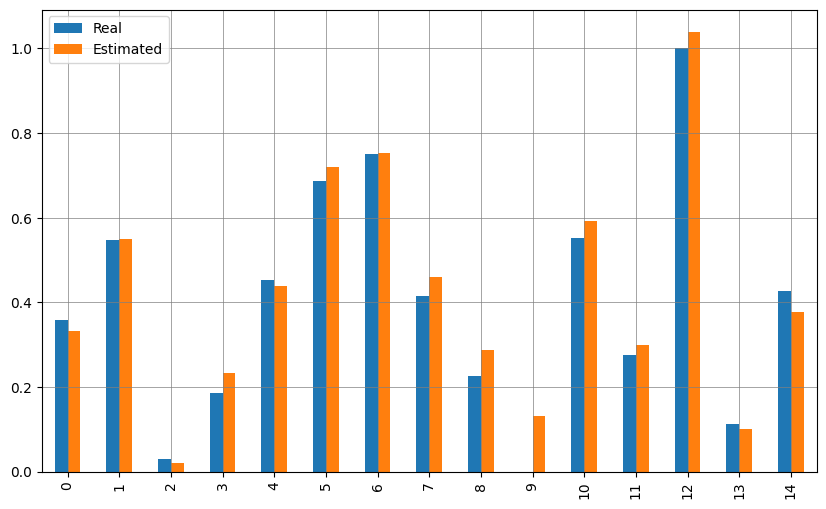

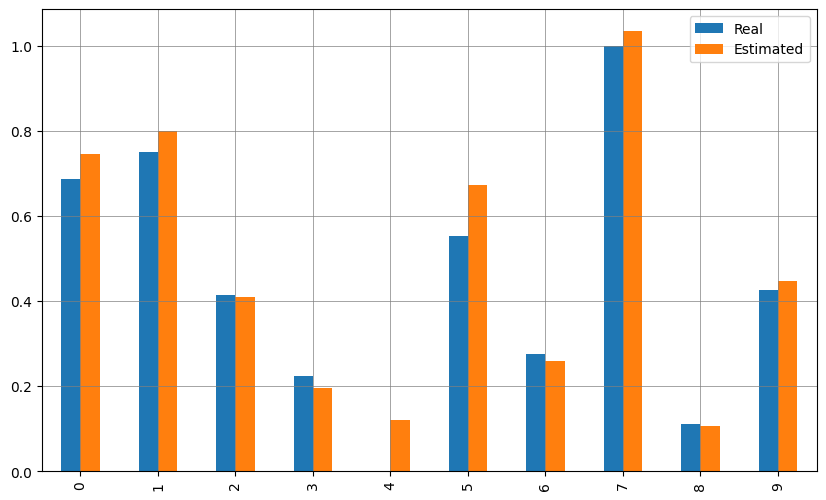

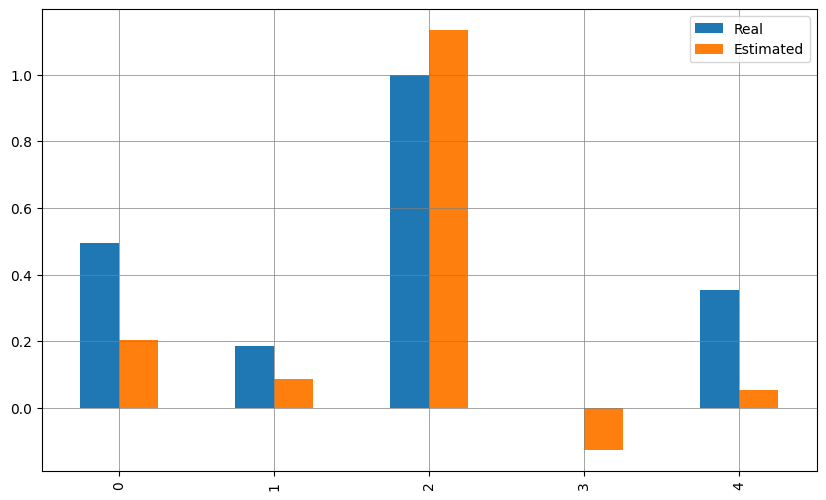

In [37]:
# Network 01, the best performance was in T2

y_teste_5 = y_teste_5.ravel()
y_pred_5T2 = y_pred_5T2.ravel()

print('\n')
df_temp = pd.DataFrame({'Real': y_teste_5, 'Estimated': y_pred_5T2}) # Creation of a dataframe with the desired data and those estimated in the prediction
df_temp = df_temp.head(20) # Stores the number of elements to be presented in the chart, as it can be visually difficult to abstract if there is a lot of information
df_temp.plot(kind='bar',figsize=(10,6)) # Setting the 'bar' chart type and figure size
plt.grid(which='major', linestyle='-', linewidth='0.5', color='gray') # Grid
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='blue') # Grid 2
plt.show() # Presents the graph comparing the desired and estimated by the neural model

# Network 02, the best performance was in T1

y_teste_10 = y_teste_10.ravel()
y_pred_10T1 = y_pred_10T1.ravel()

print('\n')
df_temp = pd.DataFrame({'Real': y_teste_10, 'Estimated': y_pred_10T1}) # Creation of a dataframe with the desired data and those estimated in the prediction
df_temp = df_temp.head(20)
df_temp.plot(kind='bar',figsize=(10,6))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='gray')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='blue')
plt.show() # Presents the graph comparing the desired and estimated by the neural model

# Network 03, the best performance was in T2

y_teste_15 = y_teste_15.ravel()
y_pred_15T2 = y_pred_15T2.ravel()

print('\n')
df_temp = pd.DataFrame({'Real': y_teste_15, 'Estimated': y_pred_15T2}) # Creation of a dataframe with the desired data and those estimated in the prediction
df_temp = df_temp.head(20)
df_temp.plot(kind='bar',figsize=(10,6))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='gray')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='blue')
plt.show() # Presents the graph comparing the desired and estimated by the neural model